In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#导入数据
datas = pd.read_csv('C:/Users/Lenovo/Desktop/Titanic/train.csv')

datas.info()
datas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#死亡与存活的比例
datas['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

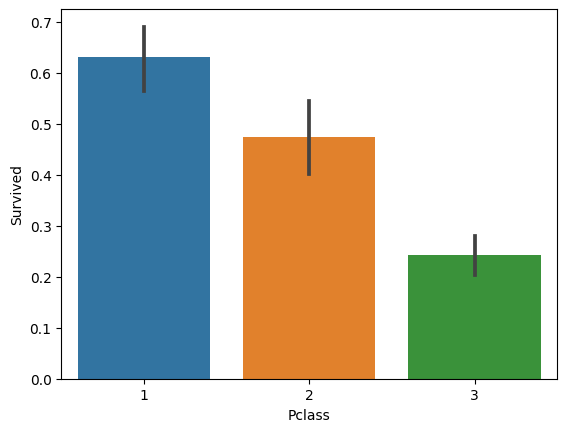

In [6]:
#社会等级对存活的影响
sns.barplot(x='Pclass',y='Survived',data=datas)

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

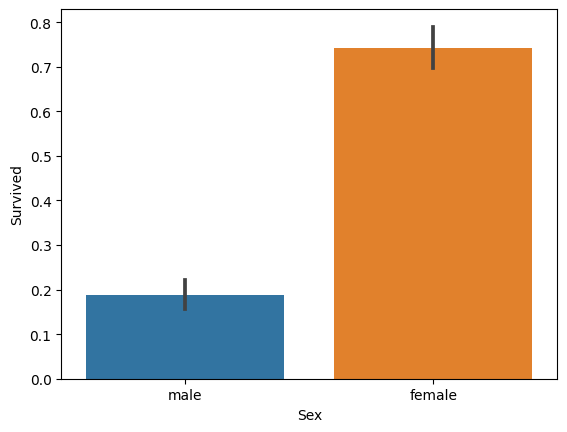

In [7]:
#性别对存活的影响
sns.barplot(x='Sex',y='Survived',data=datas)

Text(0.5, 1.0, 'Survived status by GroupAge')

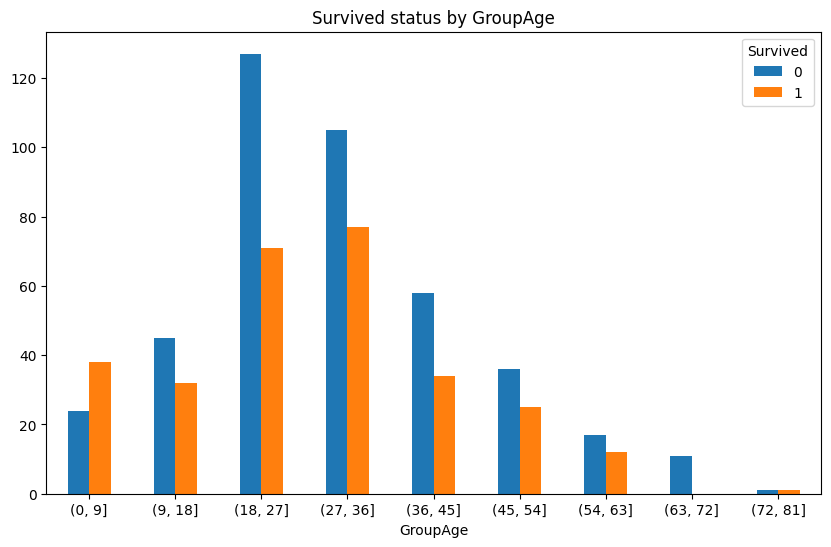

In [8]:
#对年龄进行分组
bins = [0,9,18,27,36,45,54,63,72,81,90]

datas['GroupAge'] = pd.cut(datas.Age,bins)

GroupAge_Survived = pd.crosstab(datas['GroupAge'], datas['Survived'])  #生成GroupAge与Survived列联表
GroupAge_Survived.plot(kind = 'bar',figsize=(10,6))

plt.xticks(rotation=360)
plt.title("Survived status by GroupAge")


## 数据预处理

In [9]:
datas.drop(['Name','Cabin','Ticket','PassengerId','GroupAge'],inplace=True,axis=1)    #特征选择

datas['Age'] = datas['Age'].fillna(datas['Age'].mean())    #用平均值填充年龄的缺失值(.median()是中位数)

datas = datas.dropna(axis=0)      #删除含有空白值的行记录
datas.info() 
datas.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
#男性为1，女性为0
datas['Sex'] = (datas['Sex'] == 'male').astype('int')

#三个港口分别为C、Q、S，映射成0、1、2
datas['Embarked'] = datas['Embarked'].map({'S':0,'C':1,'Q':2})


datas.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


## 随机生成树分类

In [16]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)       #test_size是测试集占总数据集的比例


0.8211567926455567 45


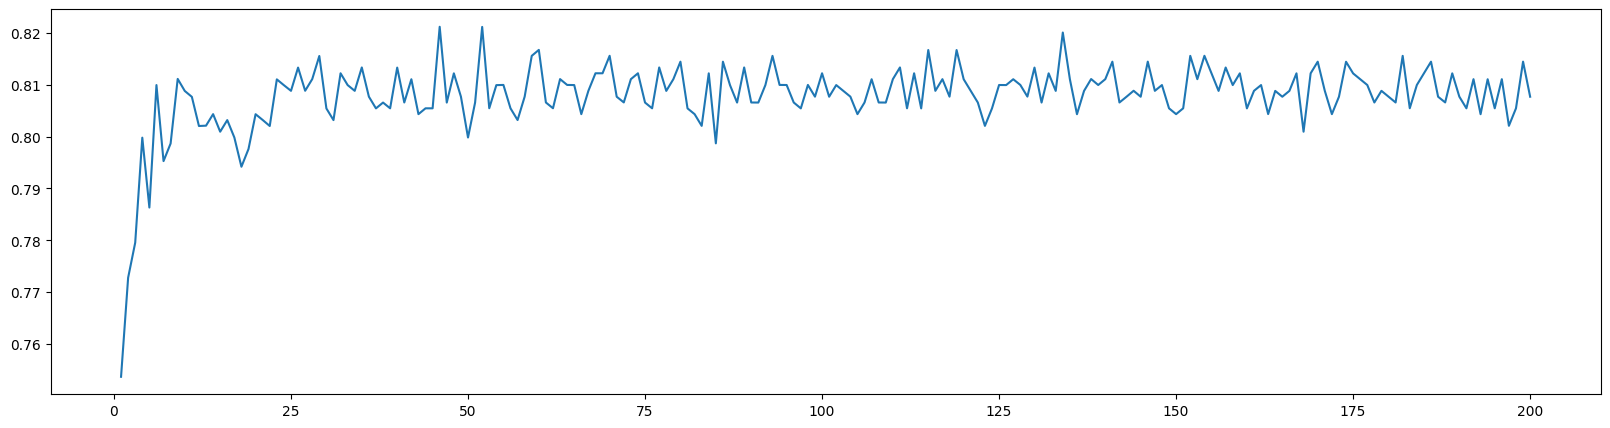

In [14]:
x = datas.iloc[:,datas.columns !="Survived"]
y = datas.iloc[:,datas.columns =="Survived"]

# n_estimators学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,x,y,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [18]:
rfc = RandomForestClassifier(n_estimators=45
                             ,random_state=42
                             ,max_depth=5
                             ,min_samples_leaf=10
                             ,min_samples_split=10
                             )
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)

print('测试准确度：%f' %score_r)

测试准确度：0.805243
